# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from datetime import datetime

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

612

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it's being processed (with the city number and city name).


In [3]:
base_url = f"https://api.openweathermap.org/data/2.5/weather?units=imperial&"

# define empty lists to store city's data
city_name = []
cloudiness = []
country_name = []
date = []
humidity = []
latitude = []
longitude = []
max_temp = []
wind_speed = []

# iterate through 'cities' and initiate query
# (https://stackoverflow.com/questions/522563/accessing-the-index-in-for-loops)
for index, city in enumerate(cities, start=1):
    city = city 
    query_url = base_url + f"appid={weather_api_key}&q=" + city
    response = requests.get(query_url).json()
    
    # try/except in case 'city' isn't found
    try:
        city_name.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country_name.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        latitude.append(response["coord"]["lat"])
        longitude.append(response["coord"]["lon"])
        max_temp.append(response["main"]["temp_max"])
        wind_speed.append(response["wind"]["speed"])
        
        print(f"Processing record #{index}: {city}")
        
    # if 'city' isn't found
    except KeyError:
        print(f"Processing record #{index}: {city} not found...")
    

Processing record #1: komsomolets
Processing record #2: rikitea
Processing record #3: lorengau
Processing record #4: ushuaia
Processing record #5: te anau
Processing record #6: kropotkin
Processing record #7: nizhneyansk not found...
Processing record #8: olafsvik
Processing record #9: muravlenko
Processing record #10: seoul
Processing record #11: hithadhoo
Processing record #12: hermanus
Processing record #13: redmond
Processing record #14: gobabis
Processing record #15: el retorno
Processing record #16: galle
Processing record #17: vilyuysk
Processing record #18: new norfolk
Processing record #19: nishihara
Processing record #20: nikolskoye
Processing record #21: souillac
Processing record #22: belushya guba not found...
Processing record #23: kantang
Processing record #24: hobart
Processing record #25: cape town
Processing record #26: hilo
Processing record #27: mataura
Processing record #28: lagos
Processing record #29: punta arenas
Processing record #30: sechura
Processing record 

Processing record #243: leshukonskoye
Processing record #244: wamba
Processing record #245: hofn
Processing record #246: muros
Processing record #247: airai
Processing record #248: san pedro
Processing record #249: batemans bay
Processing record #250: attawapiskat not found...
Processing record #251: kupang
Processing record #252: joutseno
Processing record #253: nome
Processing record #254: sola
Processing record #255: carutapera
Processing record #256: jumla
Processing record #257: catamarca
Processing record #258: lahaina
Processing record #259: goderich
Processing record #260: mayya
Processing record #261: naze
Processing record #262: chimoio
Processing record #263: inirida
Processing record #264: deputatskiy
Processing record #265: constitucion
Processing record #266: ossora
Processing record #267: aklavik
Processing record #268: san patricio
Processing record #269: moorhead
Processing record #270: waipawa
Processing record #271: castro
Processing record #272: logstor
Processing r

Processing record #482: ponta do sol
Processing record #483: batamshinskiy
Processing record #484: iaciara
Processing record #485: astoria
Processing record #486: scottsburgh not found...
Processing record #487: kaitangata
Processing record #488: ginir
Processing record #489: aktash
Processing record #490: guymon
Processing record #491: havelock
Processing record #492: verkhnyaya inta
Processing record #493: kuytun
Processing record #494: waddan
Processing record #495: gao
Processing record #496: kokstad
Processing record #497: springdale
Processing record #498: meulaboh
Processing record #499: utiroa not found...
Processing record #500: keti bandar
Processing record #501: ayagoz
Processing record #502: surab
Processing record #503: yunyang
Processing record #504: salalah
Processing record #505: kasulu
Processing record #506: kadnikov
Processing record #507: tynda
Processing record #508: tarbagatay
Processing record #509: madikeri
Processing record #510: sao miguel do araguaia
Processi

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
city_df = pd.DataFrame({
    "City": city_name,
    "Cloudiness": cloudiness,
    "Country": country_name,
    "Date": date,
    "Humidity": humidity,
    "Lat": latitude,
    "Lng": longitude,
    "Max Temp": max_temp,
    "Wind Speed": wind_speed
})

# (https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.rename_axis.html)
city_df = city_df.rename_axis("City_ID")

# export df into .csv
city_df.to_csv(output_data_file)

In [5]:
city_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
City_ID,,,,,,,,,
0,Komsomolets,87,KZ,1644978831,96,53.7453,62.0708,8.94,6.20
1,Rikitea,34,PF,1644978782,68,-23.1203,-134.9692,78.58,11.72
2,Lorengau,91,PG,1644978831,80,-2.0226,147.2712,81.99,7.76
3,Ushuaia,20,AR,1644978605,87,-54.8000,-68.3000,38.86,18.41
4,Te Anau,2,NZ,1644978832,43,-45.4167,167.7167,70.99,2.04


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [11]:
# first we have to check and see if any cities have humidity > 100
humidity_plus = city_df.loc[city_df["Humidity"] > 100]
humidity_plus

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
City_ID,,,,,,,,,


In [ ]:
#  Get the indices of cities that have humidity over 100%.


In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

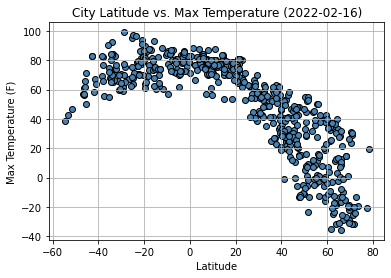

In [7]:
# from OpenWeather api documentation, we know 'dt' is given in UTC
# (https://stackoverflow.com/questions/30921399/datetime-fromtimestamp-vs-datetime-utcfromtimestamp-which-one-is-safer-to-use)
timestamp = city_df["Date"][0]
utc_from_timestamp = datetime.utcfromtimestamp(timestamp)
# extract the date as %Y-%m-%d to include in plot title
# (https://www.geeksforgeeks.org/how-to-convert-datetime-to-date-in-python/)
date = utc_from_timestamp.date()

# plot the data
# (https://matplotlib.org/stable/gallery/color/named_colors.html)
plt.scatter(city_df["Lat"], city_df["Max Temp"], marker='o', color='steelblue', edgecolor='black')
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title(f"City Latitude vs. Max Temperature ({date})")
plt.grid(visible=True)
plt.savefig("output_data/lat_vs_temp.png")

plt.show()


## Latitude vs. Humidity Plot

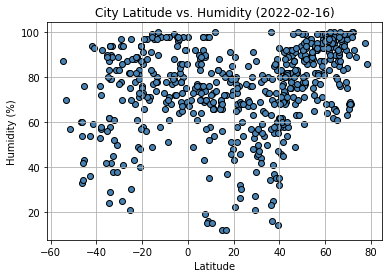

In [8]:
plt.scatter(city_df["Lat"], city_df["Humidity"], marker='o', color='steelblue', edgecolor='black')
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f"City Latitude vs. Humidity ({date})")
plt.grid(visible=True)
plt.savefig("output_data/lat_vs_humidity.png")

plt.show()

## Latitude vs. Cloudiness Plot

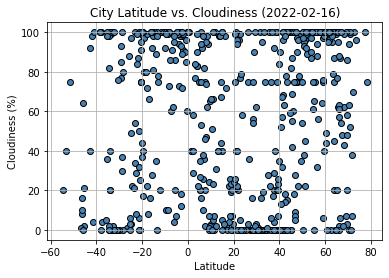

In [9]:
plt.scatter(city_df["Lat"], city_df["Cloudiness"], marker='o', color='steelblue', edgecolor='black')
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title(f"City Latitude vs. Cloudiness ({date})")
plt.grid(visible=True)
plt.savefig("output_data/lat_vs_clouds.png")

plt.show()

## Latitude vs. Wind Speed Plot

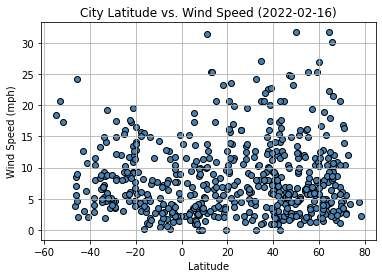

In [10]:
plt.scatter(city_df["Lat"], city_df["Wind Speed"], marker='o', color='steelblue', edgecolor='black')
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title(f"City Latitude vs. Wind Speed ({date})")
plt.grid(visible=True)
plt.savefig("output_data/lat_vs_wind.png")

plt.show()

## Linear Regression

In [12]:
northern_hemisphere = city_df.loc[city_df["Lat"] >= 0]
southern_hemisphere = city_df.loc[city_df["Lat"] < 0]

In [20]:
# since we'll be making the same plot and linear regression several times, we could define a function to do it for us
def regress_plot(x_values, y_values):
    # line regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = slope * x_values + intercept
    regress_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"
    # create scatter plot
    plt.scatter(x_values, y_values)
    # plot regression and annotate the function
    # (https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html)
    plt.plot(x_values, regress_values, '-r')
    print(regress_eq)
    plt.xlabel("Latitude")
    plt.show()
    

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

y = -1.38x + 92.35


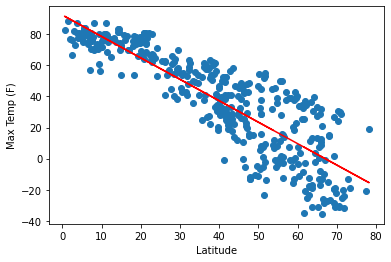

In [21]:
x_values = northern_hemisphere["Lat"]
y_values = northern_hemisphere["Max Temp"]

plt.ylabel("Max Temp (F)")
regress_plot(x_values, y_values)

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

y = 0.34x + 81.81


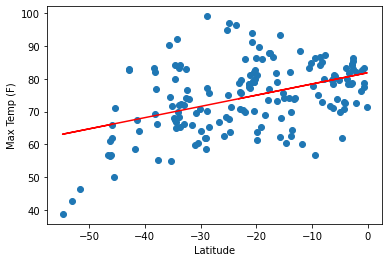

In [23]:
x_values = southern_hemisphere["Lat"]
y_values = southern_hemisphere["Max Temp"]

plt.ylabel("Max Temp (F)")
regress_plot(x_values, y_values)

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

y = 0.4x + 58.91


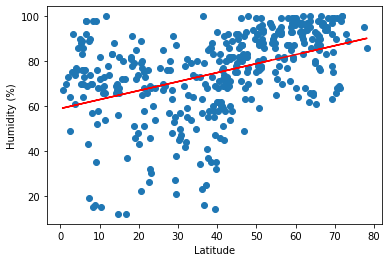

In [24]:
x_values = northern_hemisphere["Lat"]
y_values = northern_hemisphere["Humidity"]

plt.ylabel("Humidity (%)")
regress_plot(x_values, y_values)

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

y = 0.5x + 84.79


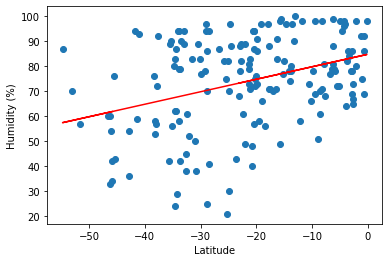

In [25]:
x_values = southern_hemisphere["Lat"]
y_values = southern_hemisphere["Humidity"]

plt.ylabel("Humidity (%)")
regress_plot(x_values, y_values)

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

y = 0.57x + 33.82


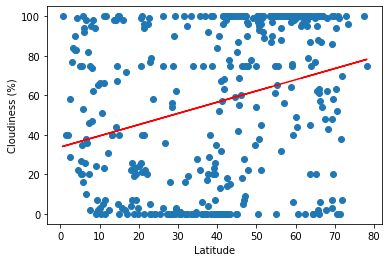

In [26]:
x_values = northern_hemisphere["Lat"]
y_values = northern_hemisphere["Cloudiness"]

plt.ylabel("Cloudiness (%)")
regress_plot(x_values, y_values)

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

y = 1.09x + 82.59


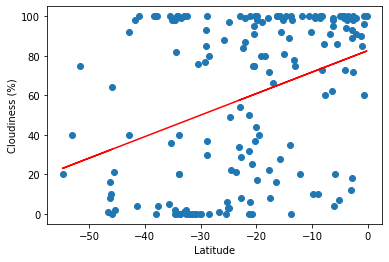

In [27]:
x_values = southern_hemisphere["Lat"]
y_values = southern_hemisphere["Cloudiness"]

plt.ylabel("Cloudiness (%)")
regress_plot(x_values, y_values)

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

y = 0.01x + 8.21


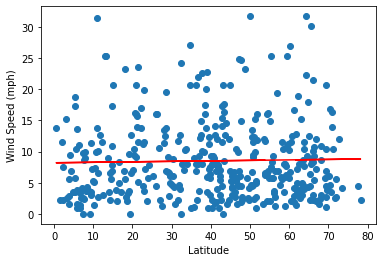

In [28]:
x_values = northern_hemisphere["Lat"]
y_values = northern_hemisphere["Wind Speed"]

plt.ylabel("Wind Speed (mph)")
regress_plot(x_values, y_values)

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

y = -0.09x + 5.54


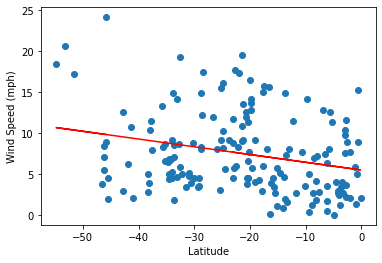

In [29]:
x_values = southern_hemisphere["Lat"]
y_values = southern_hemisphere["Wind Speed"]

plt.ylabel("Wind Speed (mph)")
regress_plot(x_values, y_values)